In [1]:
import math
from logging import debug

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil
from scipy.stats import linregress
import libraries as lib

In [2]:
# Define each directory for the required paths with updated paths
directory2 = "../../../OneDrive - HvA/Logfiles/SOLAR/2024/2024-10-24_sleeptest/0056 - 20241024T115530 1h25m5s 12.315km De Rijp - Uitgeest - De Rijp"
# Process each directory with lib.DataUitzoekenGui
result2 = lib.DataUitzoekenGui(directory2)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '1_Master_08_05.csv', '2_MPPT_0_05_05.csv', '3_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [60]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result2:
    merged_df = result2['merged_df'].copy()
    # Gebruik merged_df zoals je wilt
else:
    print("De data is nog niet geladen.")
merged_df

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische variatie,...,"2_Externe ingangsspanning, in V","2_Spanning op V_Analog, in V","2_Spanning op de supercaps, in V","2_Externe temperatuur, in graden Celsius","2_Interne temperatuur, in graden Celsius","2_Laadstroom van de supercaps, in mA","2_Stroom door de load cell, in mA",2_Datalogger port,2_Format header (>21|02),"2_Load cell interface tijd, in s"
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.293000,5.071200,5.758200,0.027200,24.305200,38.700000,12.1,B,21|02,3554.85
0 days 00:02:20,9.0,140.4098,145.861,95531.0,5233.2842,446.5866,3.9,324.9,241024.0,NaN,...,1.293000,5.072000,5.759400,0.027200,24.311800,38.740000,12.1,B,21|02,3555.75
0 days 00:02:21,9.0,141.4102,146.860,95532.0,5233.2847,446.5861,3.9,325.2,241024.0,NaN,...,1.293500,5.075000,5.762333,0.027333,24.324833,38.766667,12.1,B,21|02,3556.65
0 days 00:02:22,9.0,142.4364,147.886,95533.0,5233.2850,446.5858,3.9,325.3,241024.0,NaN,...,1.292857,5.075857,5.762714,0.027143,24.328857,38.714286,12.1,B,21|02,3557.70
0 days 00:02:23,9.0,143.4079,148.859,95534.0,5233.2856,446.5850,3.9,324.7,241024.0,NaN,...,1.292667,5.075833,5.763167,0.027167,24.333167,38.700000,12.1,B,21|02,3558.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 01:27:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.320857,5.078000,5.764714,0.027000,25.531714,38.742857,12.1,B,21|02,8667.60
0 days 01:27:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.320857,5.078571,5.764857,0.027429,25.528429,38.771429,12.1,B,21|02,8668.65
0 days 01:27:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.320333,5.077333,5.764167,0.027000,25.527667,38.766667,12.1,B,21|02,8669.70


In [61]:
# Convert '1_Tijd' from HHMMSS format to seconds since midnight
def hhmmss_to_seconds(hhmmss):
    hours = hhmmss // 10000
    minutes = (hhmmss % 10000) // 100
    seconds = hhmmss % 100
    return hours * 3600 + minutes * 60 + seconds

# Apply conversion to the time column
merged_df['Time_in_seconds'] = merged_df['1_Tijd'].apply(hhmmss_to_seconds)

#filter de data vanaf tijdstip 170000 tot 190000
#filter the data where snelheid over the grond or snelheid tenopzichte van het water is not 0 and snelheid ten opzichte van het water is lower then 20
# merged_df = merged_df[merged_df['1_Snelheid over de grond in km/h'] > 0]
# merged_df = merged_df[merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur'] > 0]
# merged_df = merged_df[merged_df['Time_in_seconds'] < 38000]
# merged_df = merged_df[merged_df['Time_in_seconds'] > 36750]


display(merged_df)
lib.plot_trajectory_map(merged_df['1_Latitude'].dropna(), merged_df['1_Longitude'].dropna(), merged_df['1_Snelheid over de grond in km/h'].dropna())

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische variatie,...,"2_Spanning op V_Analog, in V","2_Spanning op de supercaps, in V","2_Externe temperatuur, in graden Celsius","2_Interne temperatuur, in graden Celsius","2_Laadstroom van de supercaps, in mA","2_Stroom door de load cell, in mA",2_Datalogger port,2_Format header (>21|02),"2_Load cell interface tijd, in s",Time_in_seconds
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.071200,5.758200,0.027200,24.305200,38.700000,12.1,B,21|02,3554.85,NaN
0 days 00:02:20,9.0,140.4098,145.861,95531.0,5233.2842,446.5866,3.9,324.9,241024.0,NaN,...,5.072000,5.759400,0.027200,24.311800,38.740000,12.1,B,21|02,3555.75,35731.0
0 days 00:02:21,9.0,141.4102,146.860,95532.0,5233.2847,446.5861,3.9,325.2,241024.0,NaN,...,5.075000,5.762333,0.027333,24.324833,38.766667,12.1,B,21|02,3556.65,35732.0
0 days 00:02:22,9.0,142.4364,147.886,95533.0,5233.2850,446.5858,3.9,325.3,241024.0,NaN,...,5.075857,5.762714,0.027143,24.328857,38.714286,12.1,B,21|02,3557.70,35733.0
0 days 00:02:23,9.0,143.4079,148.859,95534.0,5233.2856,446.5850,3.9,324.7,241024.0,NaN,...,5.075833,5.763167,0.027167,24.333167,38.700000,12.1,B,21|02,3558.75,35734.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 01:27:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.078000,5.764714,0.027000,25.531714,38.742857,12.1,B,21|02,8667.60,NaN
0 days 01:27:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.078571,5.764857,0.027429,25.528429,38.771429,12.1,B,21|02,8668.65,NaN
0 days 01:27:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.077333,5.764167,0.027000,25.527667,38.766667,12.1,B,21|02,8669.70,NaN


In [62]:
# Calcule the acceleration by using the difference in speed over the ground
merged_df['1_Acceleration'] = merged_df['1_Snelheid over de grond in km/h'].diff()

In [63]:
# Remove rows where either column has NaN values
merged_df = merged_df[~(
    merged_df['1_Snelheid over de grond in km/h'].isna() |
    merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur'].isna()
)]
y

Indextijd
0 days 00:02:21    3.32
0 days 00:02:22    3.32
0 days 00:02:23    3.32
0 days 00:02:24    3.30
0 days 00:02:25    3.32
                   ... 
0 days 01:27:17    0.00
0 days 01:27:18    0.00
0 days 01:27:21    0.00
0 days 01:27:22    0.00
0 days 01:27:23    0.00
Name: 1_Snelheid tenopzichte van het water in Kilometers per uur, Length: 2132, dtype: float64

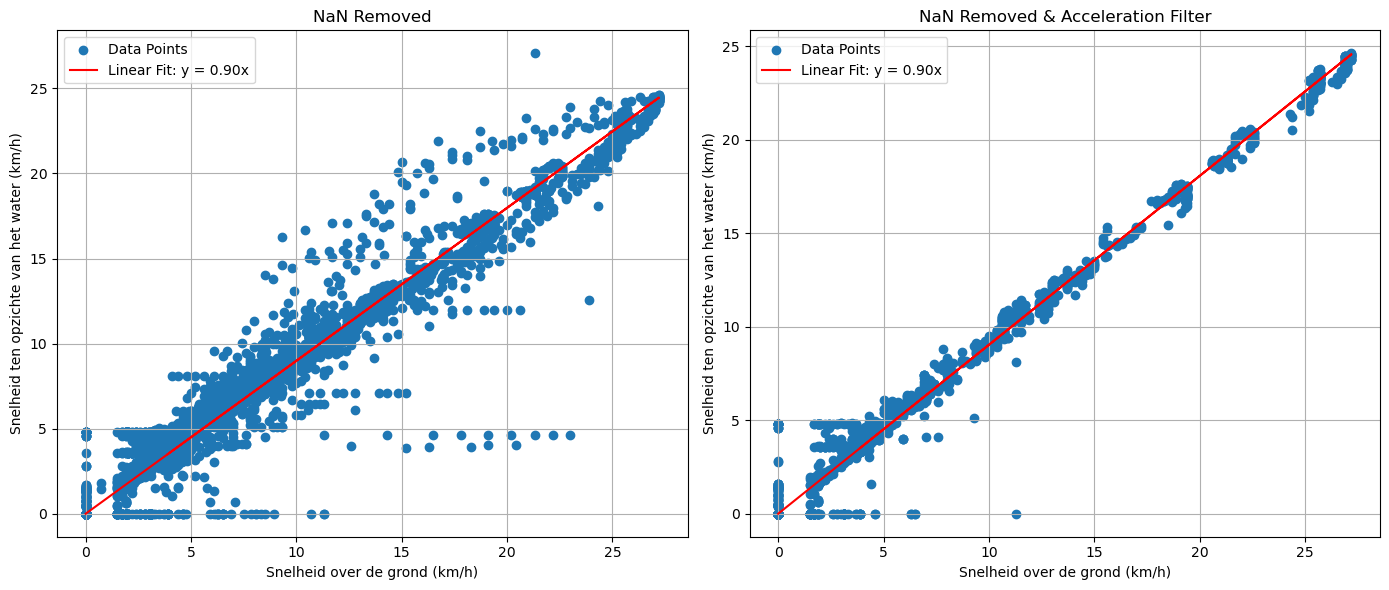

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Data preparation for the first plot (NaN removed)
filtered_df_1 = merged_df[~(
    merged_df['1_Snelheid over de grond in km/h'].isna() |
    merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur'].isna()
)]

# Extract data
x1 = filtered_df_1['1_Snelheid over de grond in km/h']
y1 = filtered_df_1['1_Snelheid tenopzichte van het water in Kilometers per uur']

# Data preparation for the second plot (NaN removed and acceleration filter applied)
filtered_df_2 = filtered_df_1[
    (filtered_df_1['1_Acceleration'] > -0.1) & 
    (filtered_df_1['1_Acceleration'] < 0.1)
]

x2 = filtered_df_2['1_Snelheid over de grond in km/h']
y2 = filtered_df_2['1_Snelheid tenopzichte van het water in Kilometers per uur']

# Function to calculate the fit and plot
def plot_data_with_fit(ax, x, y, title):
    if len(x) > 1:
        # Calculate the linear fit constrained to go through the origin
        slope, _, _, _ = np.linalg.lstsq(x.values.reshape(-1, 1), y.values, rcond=None)
        slope = slope[0]  # Extract the slope since there's only one coefficient

        # Define the linear function passing through the origin
        linear_fit = lambda x: slope * x

        # Prepare the equation for display
        equation = f"y = {slope:.2f}x"

        # Plot the data
        ax.scatter(x, y, label='Data Points')
        ax.plot(x, linear_fit(x), color='red', label=f'Linear Fit: {equation}')

        # Add labels, legend, and grid
        ax.set_xlabel('Snelheid over de grond (km/h)')
        ax.set_ylabel('Snelheid ten opzichte van het water (km/h)')
        ax.set_title(title)
        ax.legend()
        ax.grid(True)
    else:
        ax.text(0.5, 0.5, "Not enough valid data points", ha='center', va='center', fontsize=12)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot the first dataset
plot_data_with_fit(axes[0], x1, y1, 'NaN Removed')

# Plot the second dataset
plot_data_with_fit(axes[1], x2, y2, 'NaN Removed & Acceleration Filter')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


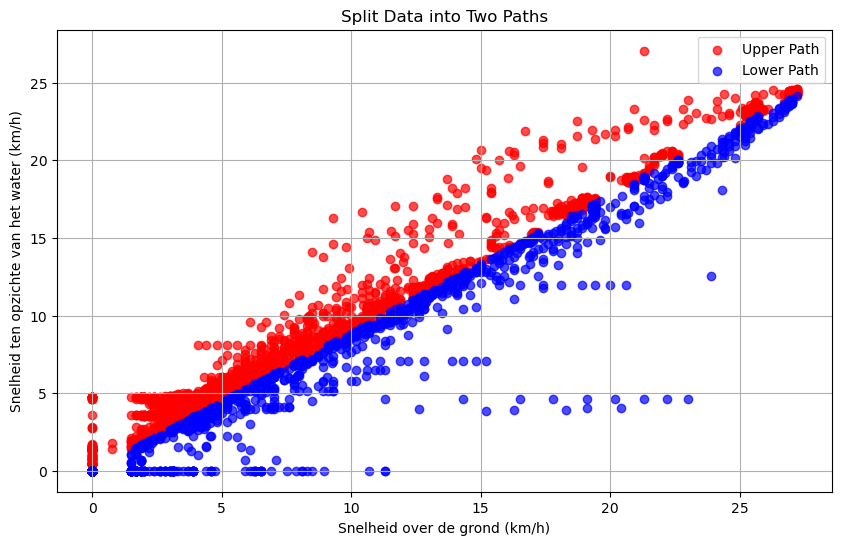

In [19]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Define the linear fit equation: y = 0.889x
def predict_y(x):
    return 0.889 * x

# Only take the data if he snelheid over the grond is higher then 6
#merged_df = merged_df[merged_df['1_Snelheid over de grond in km/h'] > 6]

# Split data into x (Snelheid over de grond) and y (Snelheid ten opzichte van het water)
x = merged_df['1_Snelheid over de grond in km/h']
y = merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur']

# Calculate predicted values and residuals
y_predicted = predict_y(x)
residuals = y - y_predicted

# Classify data into two paths based on residuals
upper_path = merged_df[residuals > 0]
lower_path = merged_df[residuals <= 0]

# Plot the split paths
plt.figure(figsize=(10, 6))
plt.scatter(upper_path['1_Snelheid over de grond in km/h'], upper_path['1_Snelheid tenopzichte van het water in Kilometers per uur'], label="Upper Path", color="red", alpha=0.7)
plt.scatter(lower_path['1_Snelheid over de grond in km/h'], lower_path['1_Snelheid tenopzichte van het water in Kilometers per uur'], label="Lower Path", color="blue", alpha=0.7)
#plt.plot(x, y_predicted, label="Fitted Line: y = 0.889x", color="black", linewidth=2)
plt.xlabel("Snelheid over de grond (km/h)")
plt.ylabel("Snelheid ten opzichte van het water (km/h)")
plt.legend()
plt.title("Split Data into Two Paths")
plt.grid(True)
plt.show()


In [20]:
merged_df

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische variatie,...,"2_Spanning op V_Analog, in V","2_Spanning op de supercaps, in V","2_Externe temperatuur, in graden Celsius","2_Interne temperatuur, in graden Celsius","2_Laadstroom van de supercaps, in mA","2_Stroom door de load cell, in mA",2_Datalogger port,2_Format header (>21|02),"2_Load cell interface tijd, in s",Time_in_seconds
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:02:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.071200,5.758200,0.027200,24.305200,38.700000,12.1,B,21|02,3554.85,NaN
0 days 00:02:20,9.0,140.4098,145.861,95531.0,5233.2842,446.5866,3.9,324.9,241024.0,NaN,...,5.072000,5.759400,0.027200,24.311800,38.740000,12.1,B,21|02,3555.75,35731.0
0 days 00:02:21,9.0,141.4102,146.860,95532.0,5233.2847,446.5861,3.9,325.2,241024.0,NaN,...,5.075000,5.762333,0.027333,24.324833,38.766667,12.1,B,21|02,3556.65,35732.0
0 days 00:02:22,9.0,142.4364,147.886,95533.0,5233.2850,446.5858,3.9,325.3,241024.0,NaN,...,5.075857,5.762714,0.027143,24.328857,38.714286,12.1,B,21|02,3557.70,35733.0
0 days 00:02:23,9.0,143.4079,148.859,95534.0,5233.2856,446.5850,3.9,324.7,241024.0,NaN,...,5.075833,5.763167,0.027167,24.333167,38.700000,12.1,B,21|02,3558.75,35734.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 01:27:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.078000,5.764714,0.027000,25.531714,38.742857,12.1,B,21|02,8667.60,NaN
0 days 01:27:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.078571,5.764857,0.027429,25.528429,38.771429,12.1,B,21|02,8668.65,NaN
0 days 01:27:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.077333,5.764167,0.027000,25.527667,38.766667,12.1,B,21|02,8669.70,NaN


In [21]:
import matplotlib.pyplot as plt

# Define the linear fit equation: y = 0.889x
def predict_y(x):
    return 0.889 * x

# Split data into x (Snelheid over de grond) and y (Snelheid ten opzichte van het water)
x = merged_df['1_Snelheid over de grond in km/h']
y = merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur']

x, y

(Indextijd
 0 days 00:02:19    NaN
 0 days 00:02:20    3.9
 0 days 00:02:21    3.9
 0 days 00:02:22    3.9
 0 days 00:02:23    3.9
                   ... 
 0 days 01:27:32    NaN
 0 days 01:27:33    NaN
 0 days 01:27:34    NaN
 0 days 01:27:35    NaN
 0 days 01:27:36    NaN
 Freq: S, Name: 1_Snelheid over de grond in km/h, Length: 5118, dtype: float64,
 Indextijd
 0 days 00:02:19     NaN
 0 days 00:02:20    3.33
 0 days 00:02:21    3.32
 0 days 00:02:22    3.32
 0 days 00:02:23    3.32
                    ... 
 0 days 01:27:32     NaN
 0 days 01:27:33     NaN
 0 days 01:27:34     NaN
 0 days 01:27:35     NaN
 0 days 01:27:36     NaN
 Freq: S, Name: 1_Snelheid tenopzichte van het water in Kilometers per uur, Length: 5118, dtype: float64)

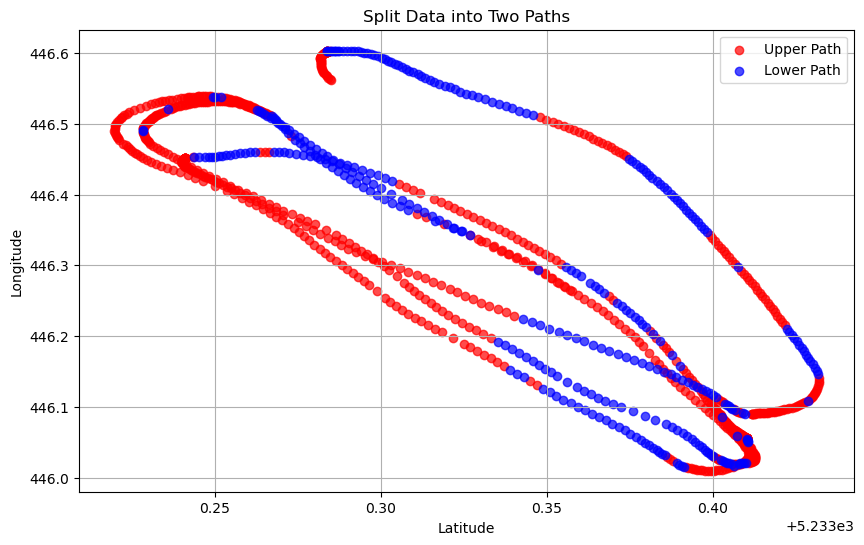

In [10]:
'''Plotting the seperate upper and lower data as latitude and longitude to see where the data is'''

# Calculate predicted values and residuals
y_predicted = predict_y(x)
residuals = y - y_predicted

# Classify data into two paths based on residuals
upper_path = merged_df[residuals > 0]
lower_path = merged_df[residuals <= 0]

# Plot the split paths
plt.figure(figsize=(10, 6))
plt.scatter(upper_path['1_Latitude'], upper_path['1_Longitude'], label="Upper Path", color="red", alpha=0.7)
plt.scatter(lower_path['1_Latitude'], lower_path['1_Longitude'], label="Lower Path", color="blue", alpha=0.7)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.title("Split Data into Two Paths")
plt.grid(True)
plt.show()


Animation saved as dynamic_lat_lon_split.html


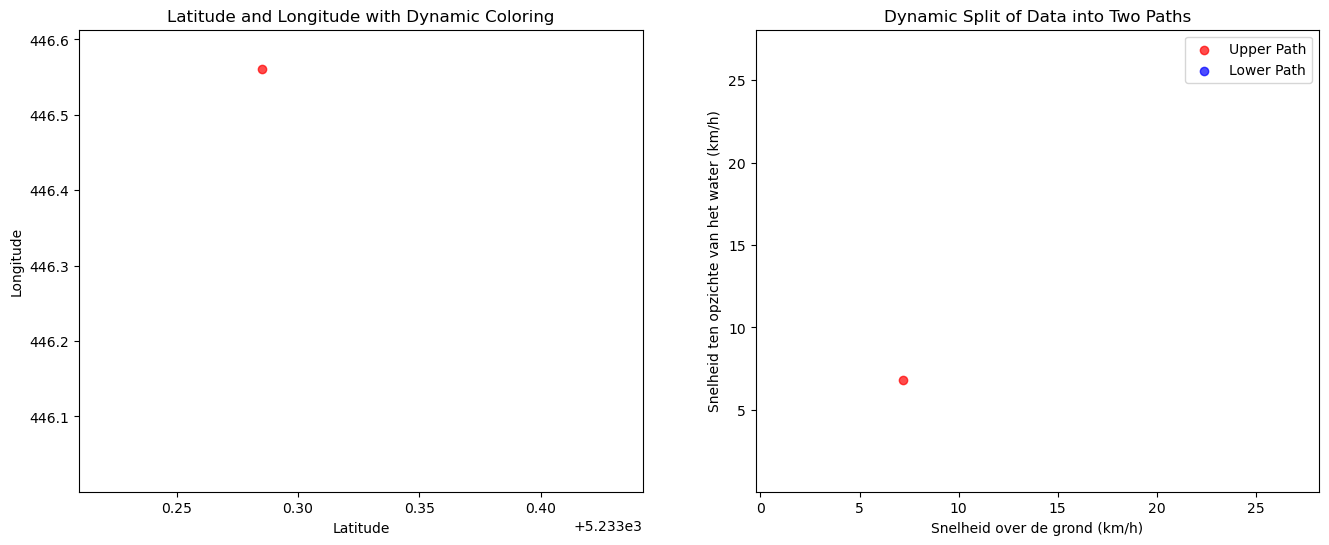

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Prepare the figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Set up the latitude-longitude plot
ax1.set_xlim(merged_df['1_Latitude'].min() - 0.01, merged_df['1_Latitude'].max() + 0.01)
ax1.set_ylim(merged_df['1_Longitude'].min() - 0.01, merged_df['1_Longitude'].max() + 0.01)
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Longitude")
ax1.set_title("Latitude and Longitude with Dynamic Coloring")

# Set up the speed comparison plot
ax2.set_xlim(merged_df['1_Snelheid over de grond in km/h'].min() - 1, 
             merged_df['1_Snelheid over de grond in km/h'].max() + 1)
ax2.set_ylim(merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur'].min() - 1, 
             merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur'].max() + 1)
ax2.set_xlabel("Snelheid over de grond (km/h)")
ax2.set_ylabel("Snelheid ten opzichte van het water (km/h)")
ax2.set_title("Dynamic Split of Data into Two Paths")

# Initialize scatter plots
scat1 = ax1.scatter([], [], alpha=0.7)
scat2_upper = ax2.scatter([], [], label="Upper Path", color="red", alpha=0.7)
scat2_lower = ax2.scatter([], [], label="Lower Path", color="blue", alpha=0.7)

# Add legend to the second plot
ax2.legend()

# Define the update function
def update(frame):
    end = frame + 1  # Display one additional row per frame
    if end > len(merged_df):  # Stop when all data is shown
        return

    # Extract data chunk
    chunk = merged_df.iloc[:end]  # Include all data up to the current frame
    
    # Determine colors for latitude-longitude plot
    chunk_lat = chunk['1_Latitude']
    chunk_lon = chunk['1_Longitude']
    chunk_residuals = chunk['1_Snelheid tenopzichte van het water in Kilometers per uur'] - (0.889 * chunk['1_Snelheid over de grond in km/h'])
    colors = ['red' if r > 0 else 'blue' for r in chunk_residuals]

    # Update the latitude-longitude scatter plot
    scat1.set_offsets(np.column_stack((chunk_lat, chunk_lon)))
    scat1.set_color(colors)
    
    # Update the speed comparison plot
    upper_chunk = chunk[chunk_residuals > 0]
    lower_chunk = chunk[chunk_residuals <= 0]
    scat2_upper.set_offsets(np.column_stack((upper_chunk['1_Snelheid over de grond in km/h'],
                                              upper_chunk['1_Snelheid tenopzichte van het water in Kilometers per uur'])))
    scat2_lower.set_offsets(np.column_stack((lower_chunk['1_Snelheid over de grond in km/h'],
                                              lower_chunk['1_Snelheid tenopzichte van het water in Kilometers per uur'])))

# Adjust the animation settings
frames_count = len(merged_df)  # Total number of frames is equal to the number of rows
anim = FuncAnimation(fig, update, frames=frames_count, repeat=False, interval=5)  # Slower animation with 500ms per frame

# Save as an HTML file
output_path = "dynamic_lat_lon_split.html"
from matplotlib.animation import HTMLWriter
writer = HTMLWriter()
anim.save(output_path, writer=writer)
print(f"Animation saved as {output_path}")

# Optionally, display the animation in the notebook
#plt.show()


In [11]:
merged_df

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische variatie,...,"2_Spanning op V_Analog, in V","2_Spanning op de supercaps, in V","2_Externe temperatuur, in graden Celsius","2_Interne temperatuur, in graden Celsius","2_Laadstroom van de supercaps, in mA","2_Stroom door de load cell, in mA",2_Datalogger port,2_Format header (>21|02),"2_Load cell interface tijd, in s",Time_in_seconds
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 00:19:20,9.0,1160.4552,1166.060,101231.0,5233.2851,446.5614,7.2,117.2,241024.0,NaN,...,5.068667,5.754167,0.026667,24.203000,38.700000,12.100000,B,21|02,4575.75,36751.0
0 days 00:19:21,9.0,1161.4551,1167.059,101232.0,5233.2846,446.5631,7.4,116.1,241024.0,NaN,...,5.070429,5.756429,0.026714,24.208286,38.742857,12.100000,B,21|02,4576.65,36752.0
0 days 00:19:22,9.0,1162.4919,1168.095,101233.0,5233.2841,446.5649,7.2,114.2,241024.0,NaN,...,5.070286,5.756571,0.026571,24.205571,38.742857,12.100000,B,21|02,4577.70,36753.0
0 days 00:19:23,9.0,1163.4569,1169.060,101234.0,5233.2838,446.5666,7.4,112.7,241024.0,NaN,...,5.067667,5.753500,0.026333,24.193500,38.733333,12.100000,B,21|02,4578.75,36754.0
0 days 00:19:24,9.0,1164.4660,1170.069,101235.0,5233.2835,446.5684,7.4,110.7,241024.0,NaN,...,5.068857,5.754857,0.026143,24.190857,38.742857,12.071429,B,21|02,4579.65,36755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:40:04,9.0,2404.4745,2410.265,103315.0,5233.3495,446.2886,26.9,299.2,241024.0,NaN,...,5.072000,5.758500,0.026667,24.520833,38.733333,12.100000,B,21|02,5819.70,37995.0
0 days 00:40:05,9.0,2405.4386,2411.229,103316.0,5233.3514,446.2828,26.9,298.4,241024.0,NaN,...,5.073714,5.760857,0.026857,24.525143,38.700000,12.100000,B,21|02,5820.60,37996.0
0 days 00:40:06,9.0,2406.4388,2412.229,103317.0,5233.3532,446.2772,26.9,297.5,241024.0,NaN,...,5.075286,5.761857,0.026857,24.529000,38.757143,12.100000,B,21|02,5821.65,37997.0


C:\Users\quinc\AppData\Local\Temp\ipykernel_24768\1217956663.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['1_Acceleration'] = merged_df['1_Snelheid over de grond in km/h'].diff()
C:\Users\quinc\AppData\Local\Temp\ipykernel_24768\1217956663.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['1_Delta Acceleration'] = merged_df['1_Acceleration'].diff()


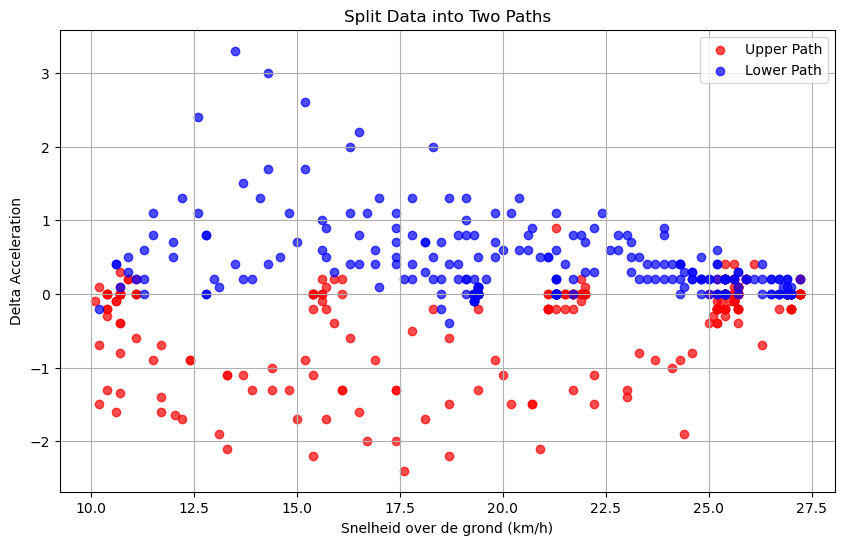

In [12]:
'''Plot the speed over the grond on the x axis, plot the difference in acceleration on the y axis'''

#Filter the data so it's only for more then 10 km/h of snelhed over de grond
merged_df = merged_df[merged_df['1_Snelheid over de grond in km/h'] > 10]

# Calcule the acceleration by using the difference in speed over the ground
merged_df['1_Acceleration'] = merged_df['1_Snelheid over de grond in km/h'].diff()

# Now make a new column with the delta in acceleration
merged_df['1_Delta Acceleration'] = merged_df['1_Acceleration'].diff()

#plot the speed over the ground on the x axis, plot the difference in acceleration on the y axis. But keep the colours of the upper and lower limit from before

# Define the linear fit equation: y = 0.889x
def predict_y(x):
    return 0.889 * x

# Split data into x (Snelheid over de grond) and y (Snelheid ten opzichte van het water)
x = merged_df['1_Snelheid over de grond in km/h']
y = merged_df['1_Delta Acceleration']
y_speed = merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur']

# Calculate predicted values and residuals
y_predicted = predict_y(x)
residuals = y_speed - y_predicted

# Classify data into two paths based on residuals
upper_path = merged_df[residuals > 0]
lower_path = merged_df[residuals <= 0]
    
# Plot the split paths. 
plt.figure(figsize=(10, 6))
plt.scatter(upper_path['1_Snelheid over de grond in km/h'], upper_path['1_Acceleration'], label="Upper Path", color="red", alpha=0.7)
plt.scatter(lower_path['1_Snelheid over de grond in km/h'], lower_path['1_Acceleration'], label="Lower Path", color="blue", alpha=0.7)
plt.xlabel("Snelheid over de grond (km/h)")
plt.ylabel("Delta Acceleration")
plt.legend()
plt.title("Split Data into Two Paths")
plt.grid(True)
plt.show()


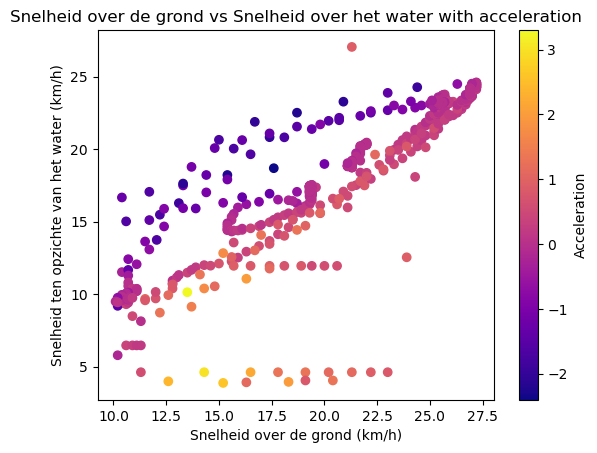

In [13]:
'''Plot snelheid over de grond vs snelheid over het water with a third axis of the acceleration'''

'''Filter the data so it's only where the acceleration is less then 0.1 and more then -0.1'''

merged_df = merged_df[merged_df['1_Acceleration'] > -0.1]
merged_df = merged_df[merged_df['1_Acceleration'] < 0.1]

plt.scatter(merged_df['1_Snelheid over de grond in km/h'], merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur'], c=merged_df['1_Acceleration'], cmap='plasma')
plt.xlabel('Snelheid over de grond (km/h)')
plt.ylabel('Snelheid ten opzichte van het water (km/h)')
plt.colorbar(label='Acceleration')
plt.title('Snelheid over de grond vs Snelheid over het water with acceleration')
plt.grid
plt.show()


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the data where acceleration is between -0.1 and 0.1
merged_df = merged_df[merged_df['1_Acceleration'] > -0.1]
merged_df = merged_df[merged_df['1_Acceleration'] < 0.1]

# Extract the variables
x = merged_df['1_Snelheid over de grond in km/h']
y = merged_df['1_Snelheid tenopzichte van het water in Kilometers per uur']

# Calculate the linear fit
coefficients = np.polyfit(x, y, 1)  # Linear fit (degree=1)
linear_fit = np.poly1d(coefficients)  # Generate the linear function

# Prepare the equation for display
equation = f"y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}"

# Plot the data
plt.scatter(x, y, c=merged_df['1_Acceleration'], cmap='plasma', label='Data Points')
plt.plot(x, linear_fit(x), color='red', label=f'Linear Fit: {equation}')

# Add labels, legend, and grid
plt.xlabel('Snelheid over de grond (km/h)')
plt.ylabel('Snelheid ten opzichte van het water (km/h)')
plt.colorbar(label='Acceleration')
plt.title('Snelheid over de grond vs Snelheid over het water with acceleration')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


LinAlgError: SVD did not converge in Linear Least Squares